In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={"figure.figsize":(25, 15)})
sns.set(font_scale=1.5)
import xgboost as xgb

from xgb_model import test_model
from utils import prepare_data, load_params

In [2]:
# Retrieve all base risks of women
base_risks = pd.read_csv("data/FRAX/baserisks.csv")
base_risks_female = base_risks[base_risks.loc[:,"female"] == 1]

In [3]:
base_risks_female = base_risks_female.pivot("age", "tscore", "mof_risk")
base_risks_female.iloc[::5, ::5]

tscore,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0
age,,,,,,,,,,,,
40,60.0,37.0,22.0,13.0,8.8,6.5,5.3,4.5,4.0,3.8,3.8,3.7
45,40.0,25.0,16.0,10.0,7.7,6.1,5.1,4.4,4.0,3.8,3.7,3.6
50,35.0,23.0,15.0,11.0,8.1,6.5,5.4,4.6,4.3,4.0,3.9,3.7
55,36.0,25.0,18.0,14.0,11.0,8.9,7.5,6.4,6.0,5.6,5.4,5.1
60,38.0,28.0,21.0,16.0,13.0,10.0,8.7,7.6,7.0,6.5,6.1,5.7
65,40.0,30.0,23.0,18.0,14.0,11.0,9.2,8.2,7.4,6.8,6.2,5.7
70,48.0,37.0,29.0,23.0,18.0,15.0,12.0,11.0,9.7,8.8,7.9,7.2
75,57.0,47.0,39.0,31.0,25.0,20.0,18.0,15.0,14.0,12.0,11.0,9.8
80,60.0,50.0,41.0,34.0,27.0,22.0,19.0,16.0,14.0,12.0,11.0,9.6


Text(0.5, 1.0, 'FRAX Fracture Risk for women with a BMI of 25')

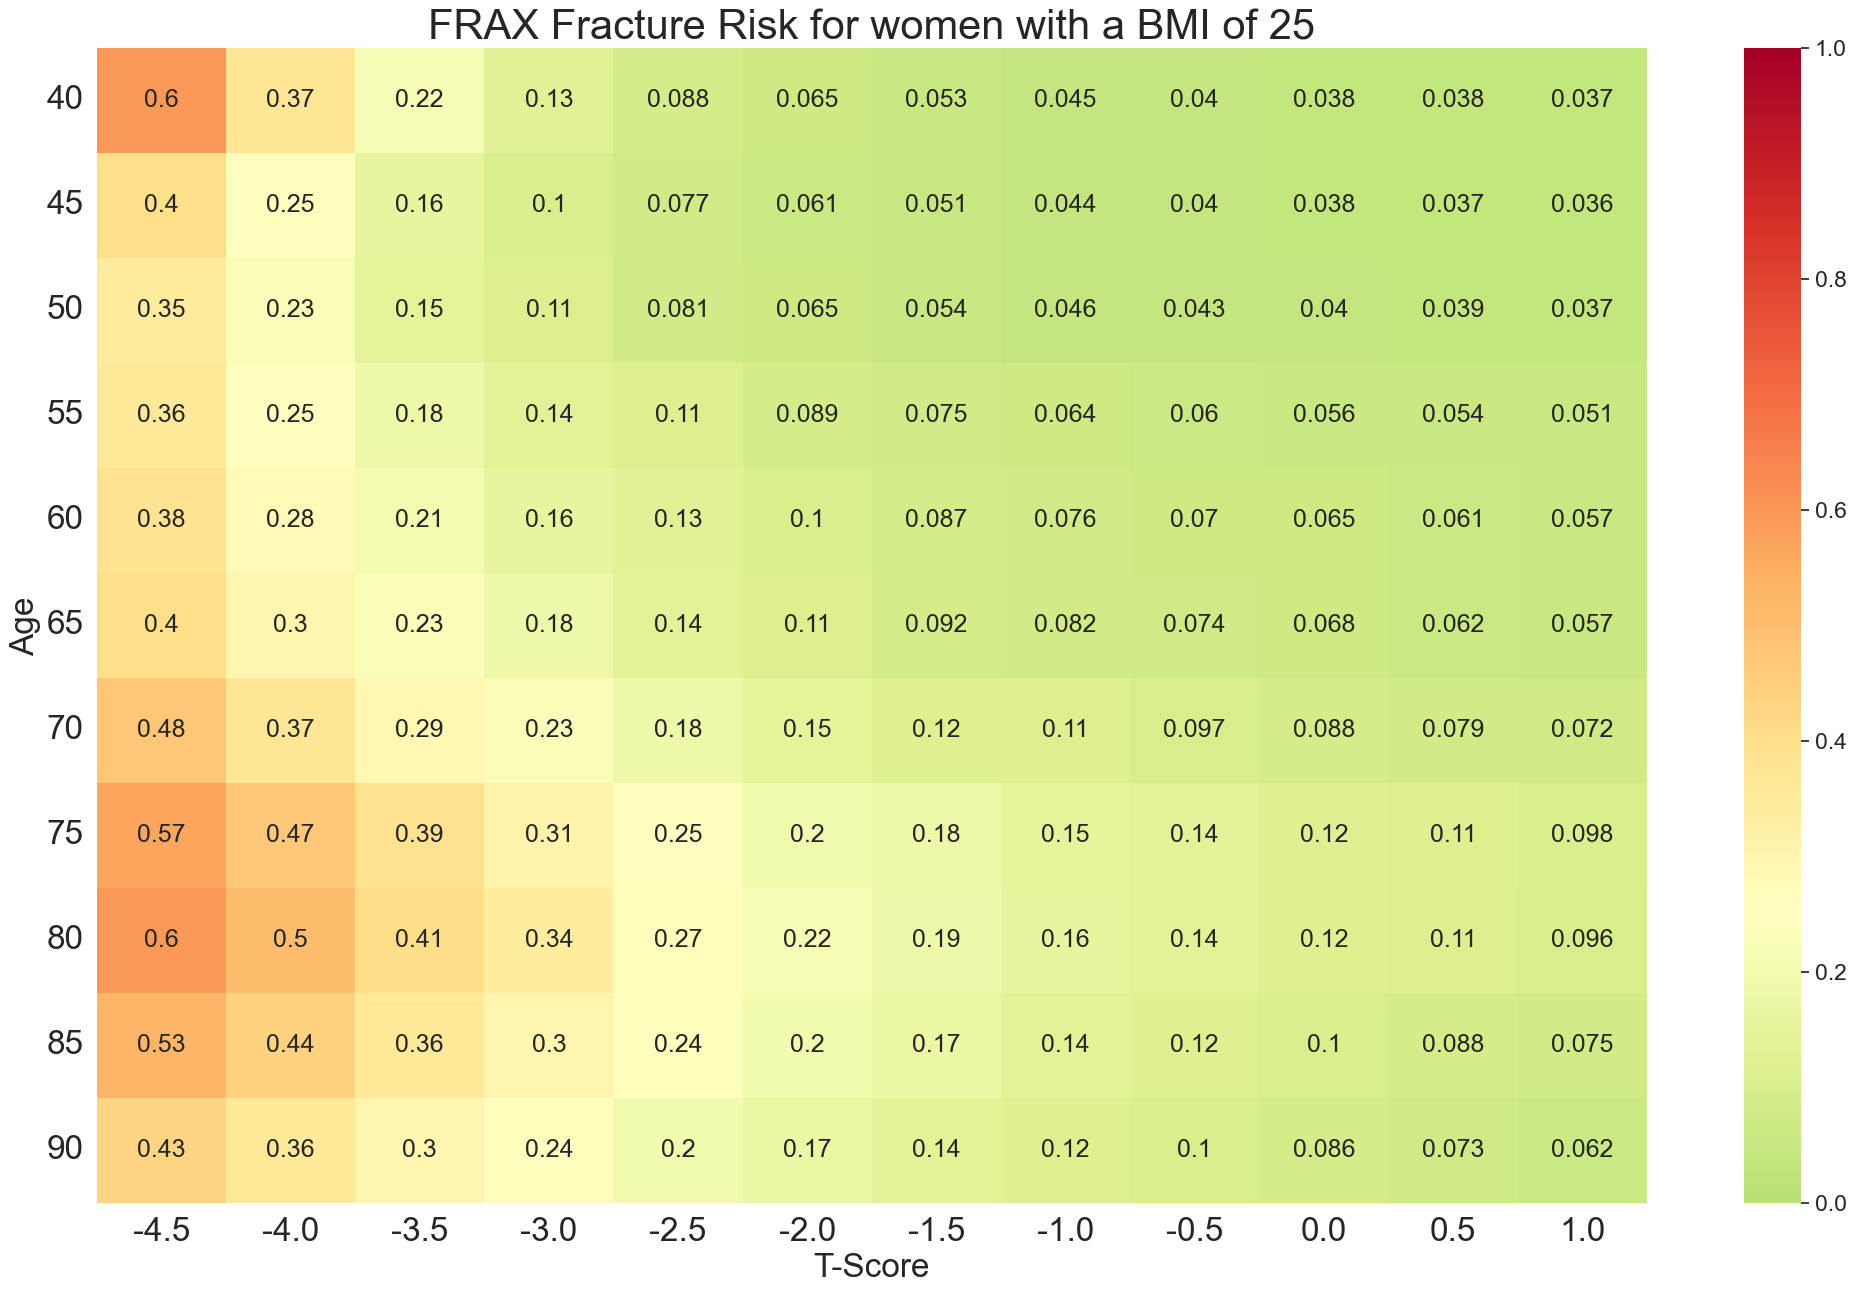

In [4]:
sns.heatmap(base_risks_female.iloc[::5, ::5] / 100, annot=True, cmap=f"RdYlGn_r", vmin=0, vmax=1.0, center=0.25)
plt.xlabel('T-Score', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
#plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title('FRAX Fracture Risk for women with a BMI of 25', fontsize=30)

# Create similar heatmap with OUR data

In [5]:
data = pd.read_csv(f"data/final/data_imputed.csv", date_parser=["date"])
data

,centerId,patientId,date,postmenopausal,praemenopausal,hrt,height,weight,bmi,hip_fracture_parents,...,previous_fracture,num_visits,tscore_ls,tscore_neck,tscore_totalHip,tbs_ls,tscore_ls_imputed,tscore_neck_imputed,tscore_totalHip_imputed,tbs_ls_imputed
0,8,1,2018-06-01,1.0,0.0,0.0,156.5,59.5,24.3,0.0,...,0.0,1.0,-1.0,-1.8,-1.2,1.470,0.0,0.0,0.0,0.0
1,8,3,2018-06-13,1.0,0.0,0.0,153.0,68.1,29.1,0.0,...,1.0,1.0,-2.6,-2.3,-2.0,1.169,0.0,0.0,0.0,0.0
2,8,4,2018-06-22,1.0,0.0,0.0,165.5,73.2,26.7,0.0,...,1.0,1.0,-3.8,-3.2,-3.1,1.290,0.0,0.0,0.0,0.0
3,8,5,2018-06-22,1.0,0.0,0.0,150.0,40.9,18.2,0.0,...,3.0,1.0,-3.1,-4.2,-3.3,1.100,1.0,0.0,0.0,1.0
4,8,6,2018-06-27,1.0,0.0,0.0,165.5,74.7,27.3,1.0,...,0.0,1.0,-2.5,-1.3,-0.9,1.295,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11621,2,19583,2022-04-19,1.0,0.0,0.0,149.0,68.0,30.6,0.0,...,2.0,1.0,-2.0,-2.9,-3.1,1.166,0.0,0.0,0.0,0.0
11622,2,19590,2020-01-15,1.0,0.0,0.0,151.0,79.0,34.6,0.0,...,3.0,1.0,-2.5,-2.8,-2.1,1.075,0.0,0.0,0.0,0.0
11623,2,19654,2020-02-13,1.0,0.0,0.0,156.5,73.0,29.8,0.0,...,0.0,1.0,-2.8,-1.4,-0.5,1.340,0.0,0.0,0.0,0.0
11624,2,19708,2014-09-17,1.0,0.0,1.0,168.0,71.0,25.2,0.0,...,0.0,1.0,-0.5,-1.6,-1.0,1.168,0.0,0.0,0.0,0.0


In [6]:
pd.options.mode.chained_assignment = None

# Keep only necessary columns
df = data[["patientId", "date", "age", "any_fracture", "any_right_censored", "tscore_neck"]]

# Create different age groups
for age in list(range(45, 95, 5)):
    df.loc[:, f"{age-5}-{age}"] = df["age"].between(age-5, age)
    
# Create different tscore groups
tscores = np.arange(-4.5, 1.5, 0.5)
for tscore in tscores:
    if tscore == -4.5:
        df.loc[:, "<-4.5"] = (df["tscore_neck"] < -4.5)
    else:
        df.loc[:,f"[{tscore-0.5},{tscore})"] = df["tscore_neck"].between(tscore-0.5, tscore, inclusive="left")
    
df = df.dropna()
df = df.sort_values(by=["patientId", "date"]).reset_index(drop=True)
df

,patientId,date,age,any_fracture,any_right_censored,tscore_neck,40-45,45-50,50-55,55-60,...,"[-4.0,-3.5)","[-3.5,-3.0)","[-3.0,-2.5)","[-2.5,-2.0)","[-2.0,-1.5)","[-1.5,-1.0)","[-1.0,-0.5)","[-0.5,0.0)","[0.0,0.5)","[0.5,1.0)"
0,1,2018-06-01,73.3,28.689,1.0,-1.8,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
1,3,2018-06-13,80.9,27.574,1.0,-2.3,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,4,2018-06-22,69.5,28.164,1.0,-3.2,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
3,5,2018-06-22,76.2,6.328,0.0,-4.2,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,6,2018-06-27,59.3,25.279,1.0,-1.3,False,False,False,True,...,False,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10656,19583,2022-04-19,84.2,0.033,0.0,-2.9,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10657,19590,2020-01-15,82.2,27.049,1.0,-2.8,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
10658,19654,2020-02-13,61.1,26.295,1.0,-1.4,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
10659,19708,2014-09-17,45.2,91.180,1.0,-1.6,False,True,False,False,...,False,False,False,False,True,False,False,False,False,False


In [7]:
age_groups = df.loc[:,"40-45":"85-90"].columns
tscore_groups = df.loc[:,"<-4.5":].columns
df_result = pd.DataFrame()
df_patients = pd.DataFrame()
for age_group in age_groups:
    for tscore_group in tscore_groups:
        age_col = df[age_group]
        tscore_col = df[tscore_group]
        ix = (age_col == True) & (tscore_col == True)
        #num_patients = ix.sum()
        interesting_patients = df[ix].groupby("patientId").first().reset_index()
        num_patients = len(interesting_patients)
        df_patients.loc[age_group, tscore_group] = num_patients
        if num_patients > 10:
            num_fractures = len(interesting_patients[(interesting_patients["any_fracture"] <= 120) & (interesting_patients["any_right_censored"] == 0)])
            df_result.loc[age_group, tscore_group] = num_fractures / num_patients
        else:
            df_result.loc[age_group, tscore_group] = None
df_result

,<-4.5,"[-4.5,-4.0)","[-4.0,-3.5)","[-3.5,-3.0)","[-3.0,-2.5)","[-2.5,-2.0)","[-2.0,-1.5)","[-1.5,-1.0)","[-1.0,-0.5)","[-0.5,0.0)","[0.0,0.5)","[0.5,1.0)"
40-45,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.090909,0.000000,NaN,NaN,NaN
45-50,NaN,NaN,NaN,NaN,NaN,0.272727,0.021277,0.103448,0.200000,NaN,NaN,NaN
50-55,NaN,NaN,NaN,0.142857,0.084746,0.242991,0.215686,0.166667,0.104478,0.025641,NaN,NaN
55-60,NaN,NaN,NaN,0.218750,0.168919,0.144000,0.209622,0.131868,0.134831,0.115385,0.111111,NaN
60-65,NaN,NaN,NaN,0.207547,0.156098,0.176944,0.197309,0.129921,0.176000,0.071429,0.176471,NaN
65-70,NaN,NaN,0.384615,0.235294,0.177866,0.179541,0.213333,0.200000,0.153846,0.145161,0.181818,0.071429
70-75,NaN,NaN,0.166667,0.246575,0.190813,0.170259,0.188867,0.181102,0.149533,0.196078,0.000000,NaN
75-80,NaN,NaN,0.363636,0.210526,0.252809,0.181529,0.204301,0.134146,0.135802,0.166667,0.200000,NaN
80-85,NaN,NaN,NaN,0.166667,0.278846,0.217143,0.237113,0.166667,0.166667,0.166667,NaN,NaN
85-90,NaN,NaN,NaN,0.300000,0.212121,0.166667,0.196429,0.458333,NaN,NaN,NaN,NaN


In [8]:
df_patients

,<-4.5,"[-4.5,-4.0)","[-4.0,-3.5)","[-3.5,-3.0)","[-3.0,-2.5)","[-2.5,-2.0)","[-2.0,-1.5)","[-1.5,-1.0)","[-1.0,-0.5)","[-0.5,0.0)","[0.0,0.5)","[0.5,1.0)"
40-45,0.0,0.0,0.0,1.0,2.0,6.0,10.0,11.0,11.0,0.0,1.0,3.0
45-50,1.0,0.0,0.0,1.0,10.0,22.0,47.0,29.0,20.0,8.0,1.0,2.0
50-55,0.0,0.0,2.0,14.0,59.0,107.0,153.0,96.0,67.0,39.0,10.0,7.0
55-60,0.0,1.0,7.0,32.0,148.0,250.0,291.0,182.0,89.0,52.0,18.0,8.0
60-65,0.0,2.0,10.0,53.0,205.0,373.0,446.0,254.0,125.0,42.0,17.0,6.0
65-70,0.0,2.0,13.0,68.0,253.0,479.0,525.0,305.0,143.0,62.0,22.0,14.0
70-75,1.0,1.0,12.0,73.0,283.0,464.0,503.0,254.0,107.0,51.0,13.0,6.0
75-80,0.0,6.0,11.0,57.0,178.0,314.0,372.0,164.0,81.0,36.0,15.0,3.0
80-85,1.0,1.0,7.0,30.0,104.0,175.0,194.0,60.0,24.0,18.0,7.0,1.0
85-90,1.0,0.0,6.0,20.0,33.0,48.0,56.0,24.0,6.0,2.0,1.0,1.0


Text(0.5, 1.0, 'Percentage of fractures (min. 10 patients) in the TOP Dataset')

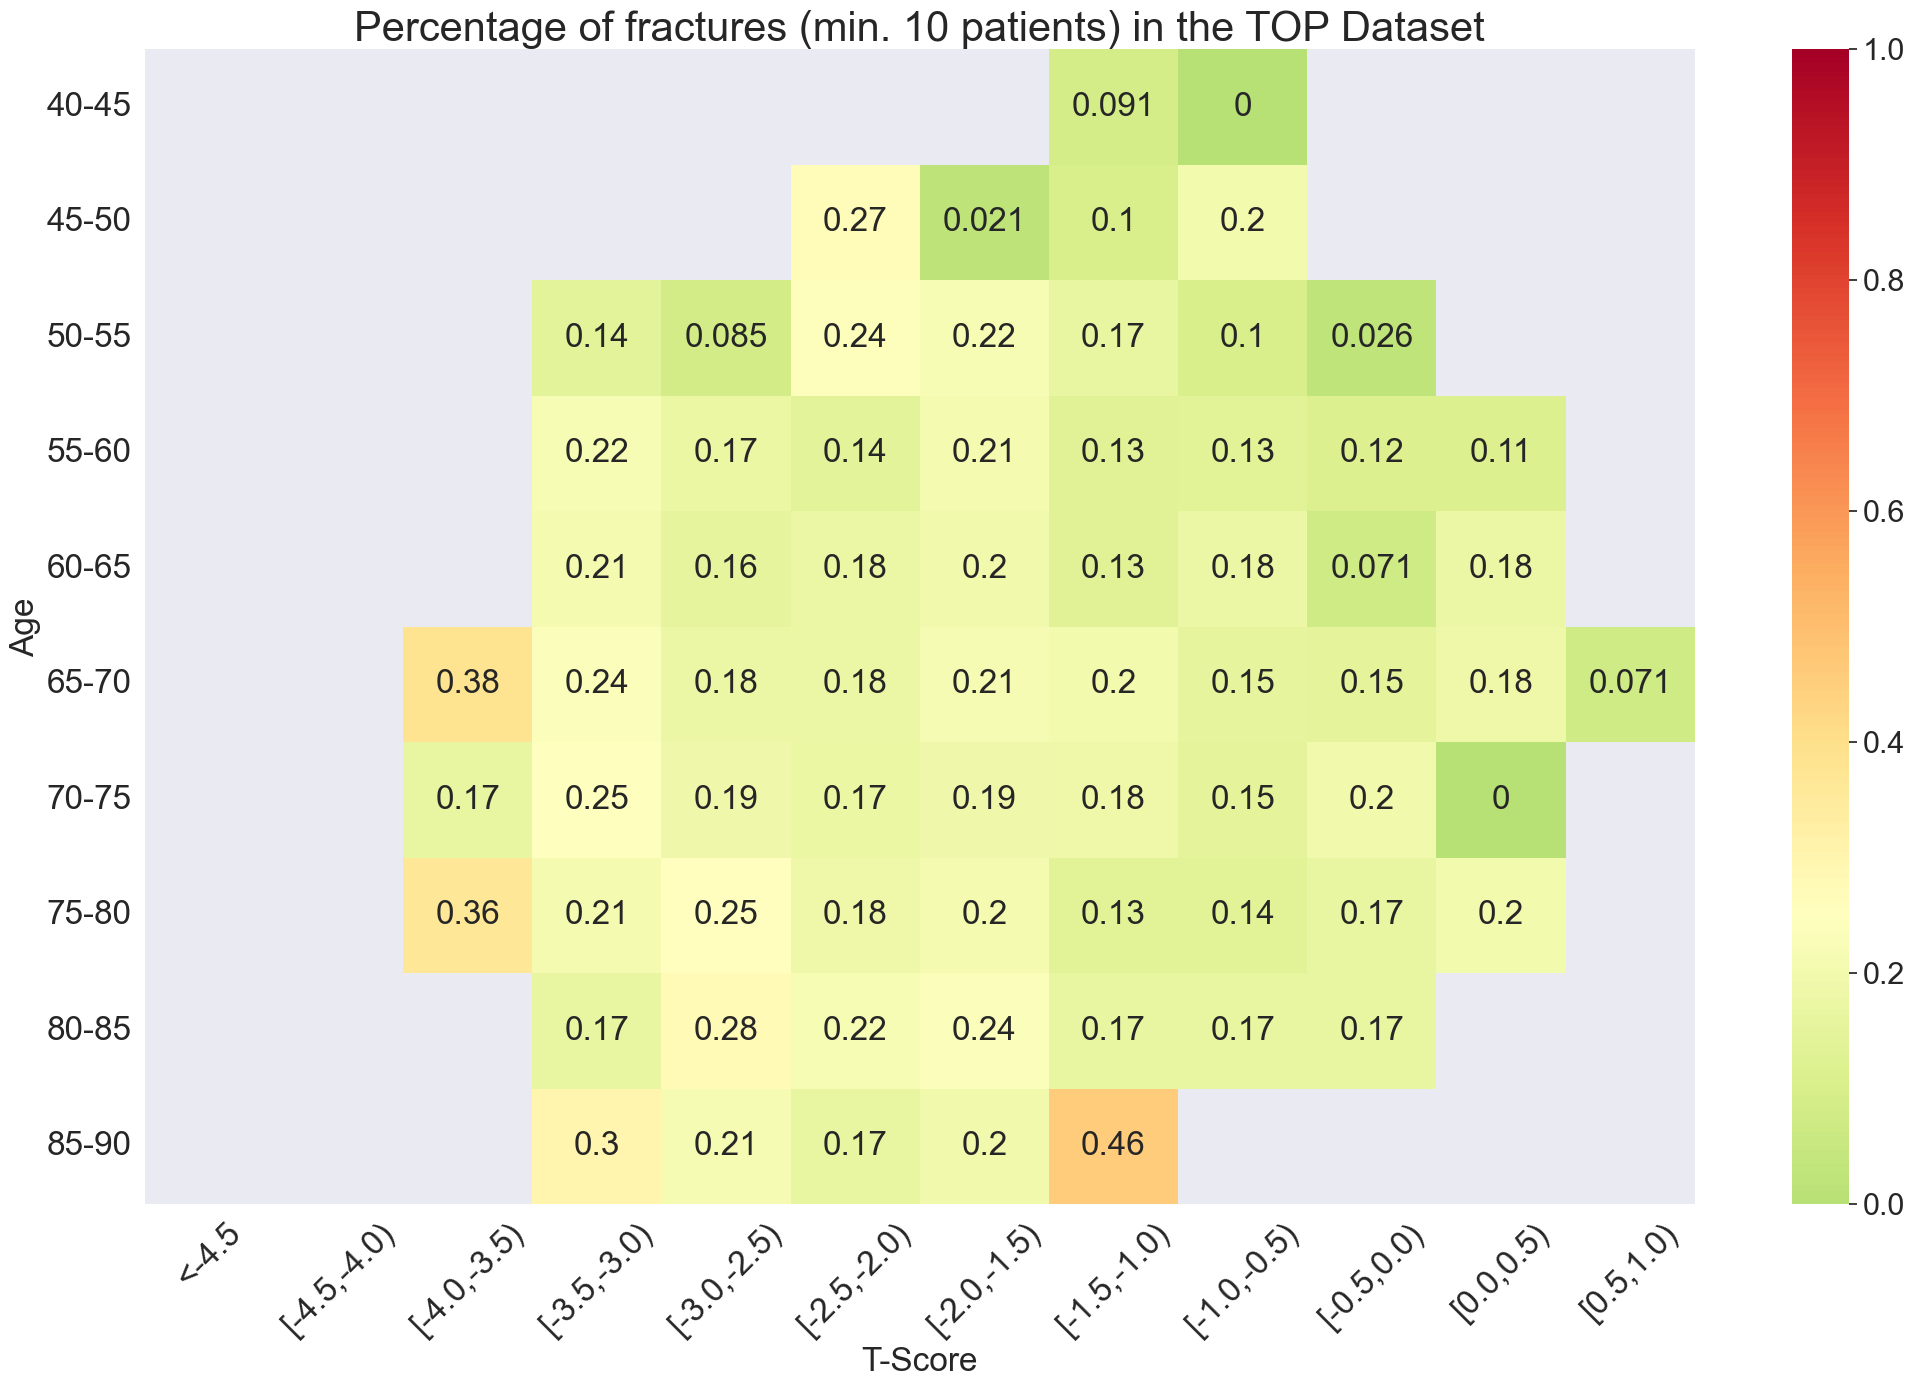

In [9]:
sns.set(rc={"figure.figsize":(25, 15)})
sns.set(font_scale=2)

sns.heatmap(df_result, annot=True, cmap=f"RdYlGn_r", vmin=0, vmax=1, center=0.25)
plt.xlabel('T-Score', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Percentage of fractures (min. 10 patients) in the TOP Dataset", fontsize=30)

Text(0.5, 1.0, 'Number of patients in the TOP Dataset')

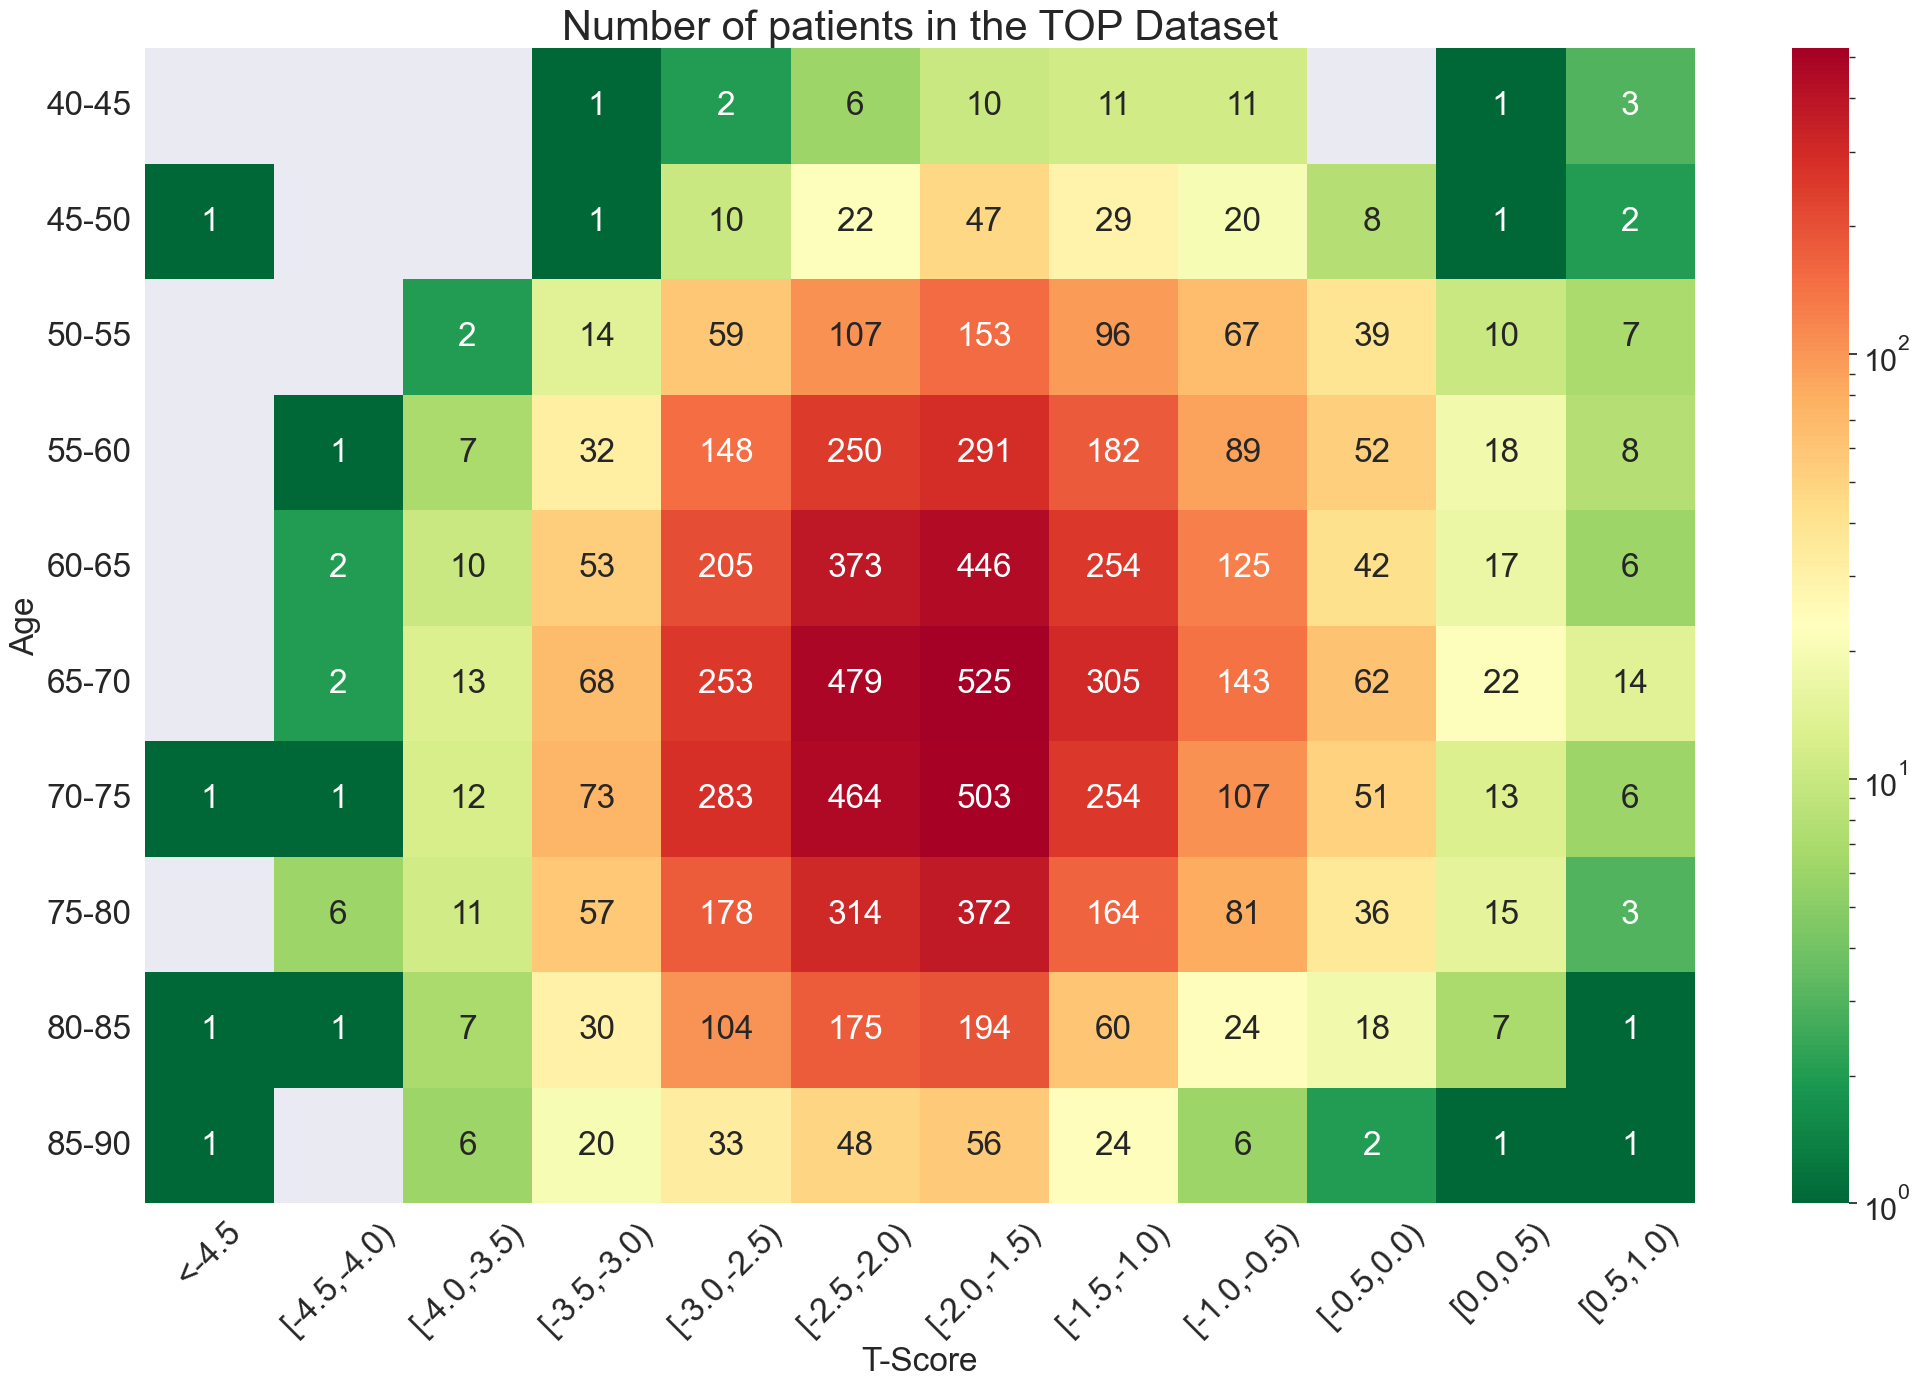

In [10]:
from matplotlib.colors import LogNorm
sns.set(rc={"figure.figsize":(25, 15)})
sns.set(font_scale=2)

mask = df_patients == 0
sns.heatmap(df_patients, mask=mask, annot=True, cmap="RdYlGn_r", norm=LogNorm(), fmt='g')
plt.xlabel('T-Score', fontsize=24)
plt.ylabel('Age', fontsize=24)
plt.tick_params(axis='both', which='major', labelsize=24)
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.title("Number of patients in the TOP Dataset", fontsize=30)

## Create a heatmap with the risk scores from our model

In [9]:
def create_heatmap(train_data, models, model_type, fx_type="any", calibrated=True, t=24, reverse=""):
    # Create a heatmap to compare to FRAX risks
    ages = np.arange(40, 91, 5, dtype=int)
    tscores = np.arange(-4.5, 1.1, 0.5, dtype=float)
    heatmap_data = pd.DataFrame(index=ages, columns=tscores, dtype=int)
    
    # Create default row
    train_data_prep = prepare_data(train_data, fx_type, only_first_visits=False, model_type=model_type)
    default_row = pd.Series(index=train_data_prep["X"].columns, data=0, dtype=float)
    default_row["bmi"] = 25.0
    default_row["tbs_ls"] = 1.2  # mean of tbs_ls
    default_row = default_row.to_frame().T
    
    # Populate heatmap
    for age in ages:
        for tscore in tscores:
            x = default_row.copy()
            x["age"] = age
            x[["tscore_neck", "tscore_totalHip", "tscore_ls", "min_tscore"]] = tscore
            d = xgb.DMatrix(x.values, feature_names=train_data_prep["X"].columns.tolist())
            xgb_output = models["xgb"].predict(d)[0]
            if calibrated:
                survival_prob = models["cox"].predict_survival_function(xgb_output.reshape(1, -1))[0](t)
                heatmap_data.loc[age, tscore] = 1 - survival_prob
            else:
                heatmap_data.loc[age, tscore] = xgb_output

    sns.heatmap(heatmap_data, annot=True, cmap=f"RdYlGn{reverse}", vmin=0, vmax=1.0, center=0.25)
    plt.xlabel('T-Score', fontsize=24)
    plt.ylabel('Age', fontsize=24)
    plt.tick_params(axis='both', which='major', labelsize=24)
    #plt.xticks(rotation=45)
    plt.yticks(rotation=0)
    plt.title(f'XGBoost Fracture Risk for women with a BMI of 25', fontsize=30)
    #plt.title(f'XGBoost ({model_type}, calibrated={calibrated}) Fracture Risk for women with a BMI of 25', fontsize=30)
    return heatmap_data

any
Harrel C-Index (global): 0.6321
Harrel C-Index (t=2y): 0.6366
Uno C-Index (t=2y): 0.6376


,-4.5,-4.0,-3.5,-3.0,-2.5,-2.0,-1.5,-1.0,-0.5,0.0,0.5,1.0
40,0.416731,0.416731,0.376355,0.339004,0.287904,0.257881,0.178313,0.140673,0.050743,0.025035,0.013228,0.010016
45,0.416731,0.416731,0.376355,0.339004,0.287904,0.257881,0.178313,0.140673,0.050743,0.025035,0.013228,0.010016
50,0.388362,0.388362,0.346946,0.309090,0.287904,0.257881,0.178313,0.140673,0.050743,0.025035,0.013228,0.010016
55,0.451771,0.451771,0.413146,0.376919,0.352327,0.322326,0.228129,0.186624,0.078048,0.042422,0.024405,0.019167
60,0.376929,0.376929,0.335194,0.297241,0.272170,0.242382,0.186194,0.147816,0.060647,0.031134,0.017035,0.013094
65,0.388393,0.388393,0.346978,0.309122,0.284004,0.254030,0.223818,0.182576,0.073650,0.039506,0.022465,0.017555
70,0.385120,0.385120,0.343607,0.305718,0.280609,0.250682,0.226747,0.196382,0.093833,0.053214,0.031775,0.025358
75,0.370936,0.370936,0.329058,0.291079,0.266051,0.236382,0.212789,0.183050,0.090593,0.050959,0.030211,0.024036
80,0.509887,0.509887,0.475197,0.433032,0.409797,0.326675,0.293584,0.269752,0.173436,0.124107,0.085658,0.068723
85,0.526557,0.526557,0.493214,0.452443,0.429850,0.348169,0.315224,0.291320,0.198760,0.146185,0.103906,0.084795


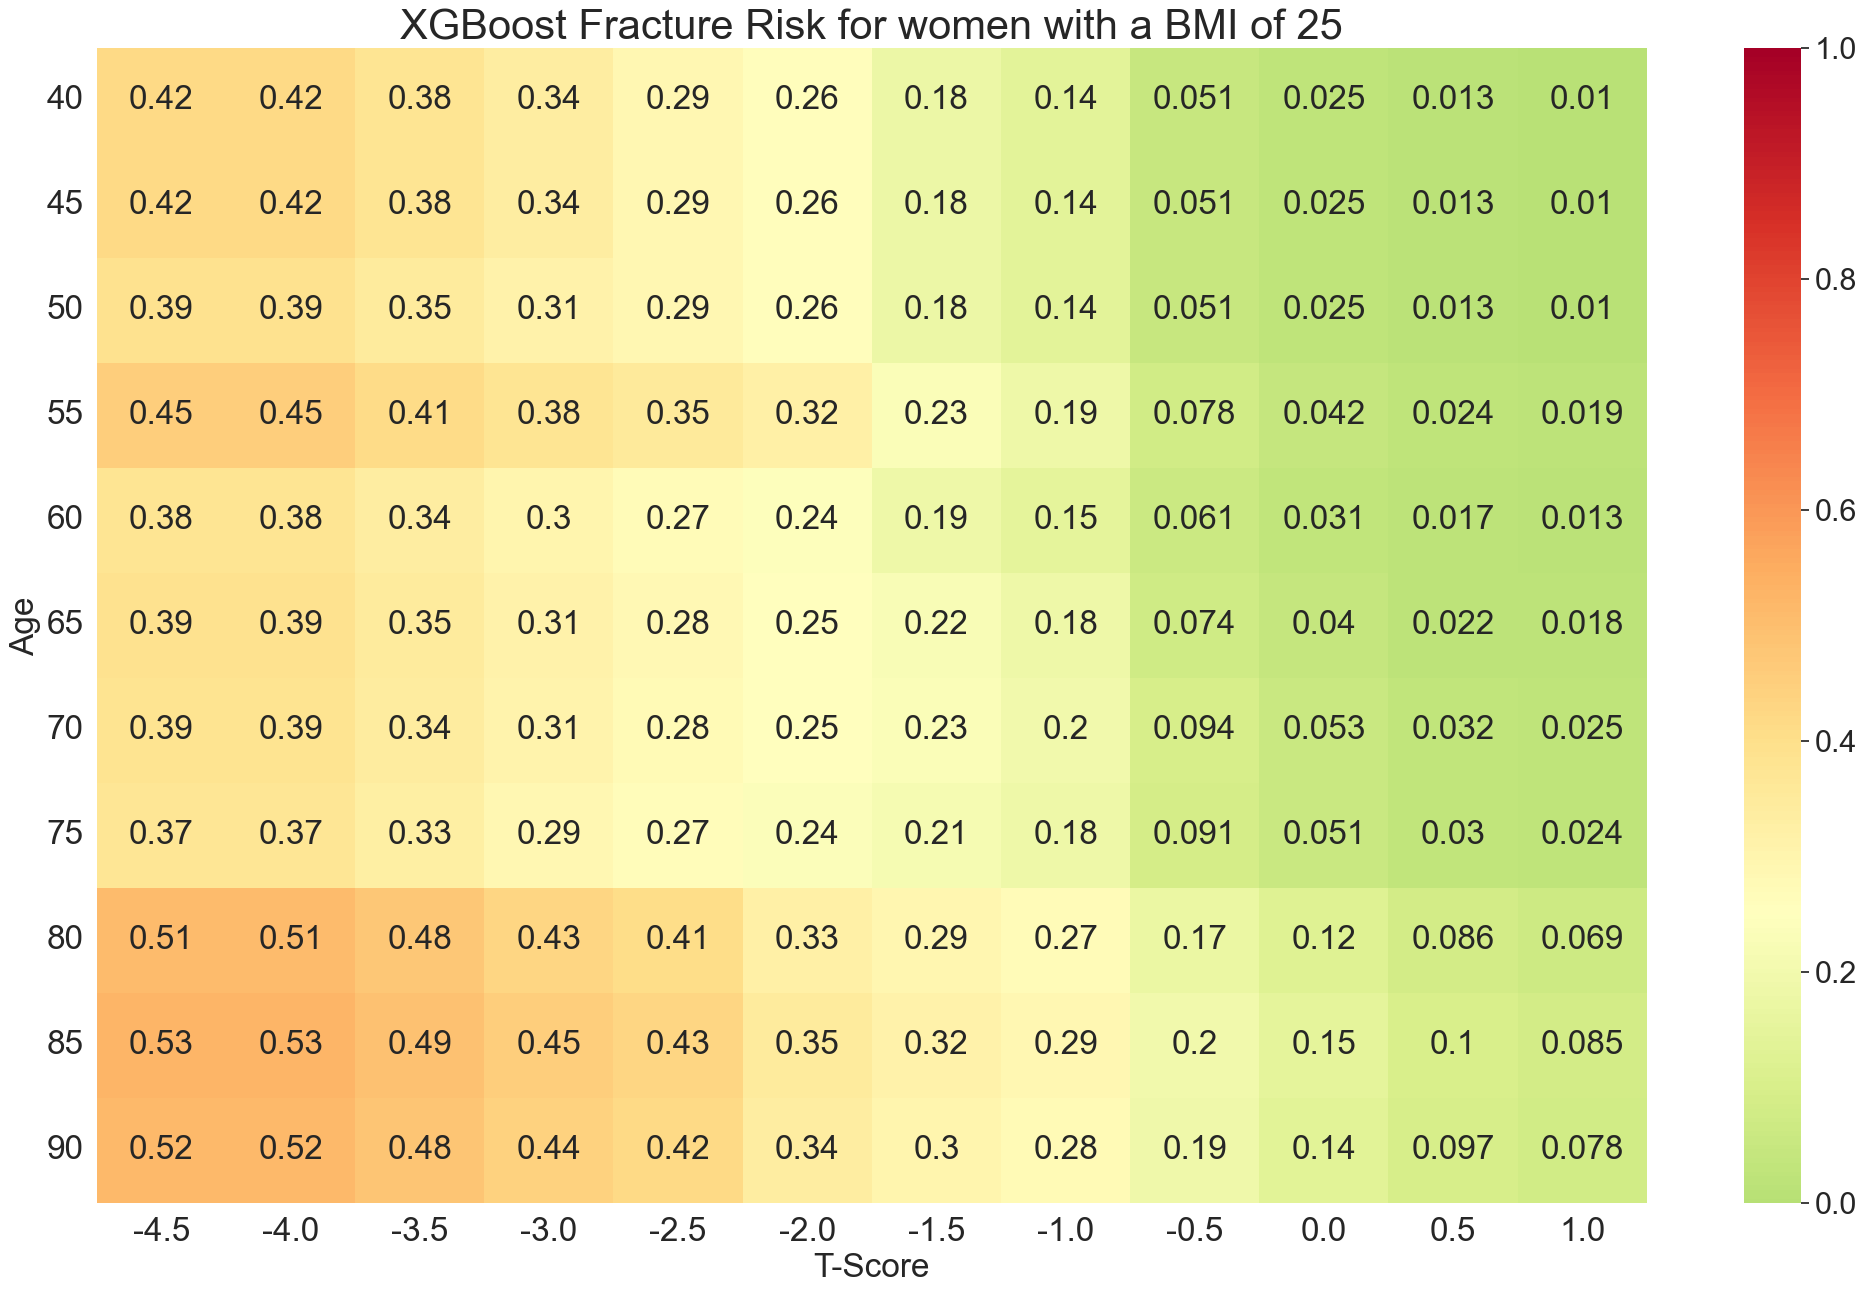

In [13]:
# Load data
train_data = pd.read_csv("data/final/train.csv", parse_dates=["date"])
test_data = pd.read_csv("data/final/test.csv", parse_dates=["date"])

TIMES = np.arange(12, 95, 12)

best_params = load_params(model="aft", constraints=True)
summary = test_model(
    train_data, test_data, best_params, 
    t=24, 
    times=TIMES, 
    modelname="aft_mono", 
    calibrated=True,
    fractures=["any_fracture"],
    bootstrap=False,
    plot=False
)

sns.set(font_scale=2)
create_heatmap(train_data, summary, "aft", fx_type="any", calibrated=True, t=84, reverse="_r")